In [155]:
import pandas as pd
import numpy as np
import seaborn as sns

In [156]:
df= pd.read_csv(r'C:\Users\barath\OneDrive\Desktop\Car price prediction.csv')

In [157]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi


In [158]:
df.shape

(72435, 10)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  int64  
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 5.5+ MB


In [160]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


In [118]:
df['model'].value_counts()

 Fiesta      6556
 Golf        4851
 Focus       4586
 Polo        3287
 3 Series    2340
             ... 
 Escort         1
 Ranger         1
 R8             1
 A2             1
 Amica          1
Name: model, Length: 138, dtype: int64

In [81]:
df['Make'].value_counts()

Ford       17964
vw         15157
BMW        10781
audi       10668
toyota      6738
skoda       6267
Hyundai     4860
Name: Make, dtype: int64

In [82]:
df['fuelType'].value_counts()

Petrol      40370
Diesel      28918
Hybrid       2903
Other         239
Electric        5
Name: fuelType, dtype: int64

In [83]:
df['transmission'].value_counts()

Manual       43021
Semi-Auto    15364
Automatic    14046
Other            4
Name: transmission, dtype: int64

In [84]:
df['year'].value_counts()

2019    19031
2017    16227
2016    11377
2018    10111
2015     5584
2020     3316
2014     3053
2013     1989
2012      480
2011      322
2010      234
2009      223
2008      157
2007      114
2006       67
2005       52
2004       32
2003       22
2002       17
2001        8
2000        6
1999        5
1998        4
1997        2
1996        2
Name: year, dtype: int64

In [85]:
df['mpg'].value_counts()

60.1    5831
65.7    3735
54.3    3159
58.9    2717
47.9    2681
        ... 
54.2       1
19.1       1
0.3        1
25.2       1
30.8       1
Name: mpg, Length: 177, dtype: int64

In [16]:
df['mileage'].value_counts()

5000     614
10       549
6000     433
1000     396
3000     330
        ... 
21797      1
55923      1
54269      1
52902      1
11472      1
Name: mileage, Length: 35743, dtype: int64

In [17]:
df['engineSize'].value_counts()

2.0    22878
1.0    16522
1.5     9120
1.6     5698
1.2     5017
3.0     4092
1.4     4012
1.8     1531
1.7      753
1.3      616
1.1      566
2.5      455
2.2      322
0.0      228
4.0      160
2.3       80
4.4       79
2.4       72
2.9       51
5.0       46
2.8       38
4.2       26
5.2       23
1.9       20
3.2       13
0.6        7
2.7        3
6.6        2
4.1        2
3.5        1
6.3        1
4.5        1
Name: engineSize, dtype: int64

In [18]:
percentiles = [0.01, 0.25, 0.50, 0.75, 0.99]
summary = df.describe(percentiles=percentiles)

In [19]:
summary

,year,price,mileage,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
1%,2010.000000,3999.000000,10.000000,0.000000,30.700000,1.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
99%,2020.000000,50714.600000,97000.000000,260.000000,86.000000,3.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


In [20]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

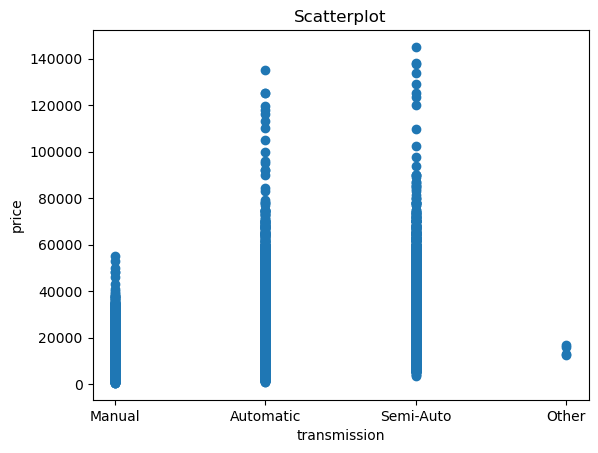

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df['transmission'], df['price'])
plt.xlabel("transmission")
plt.ylabel("price")
plt.title("Scatterplot")
plt.show()

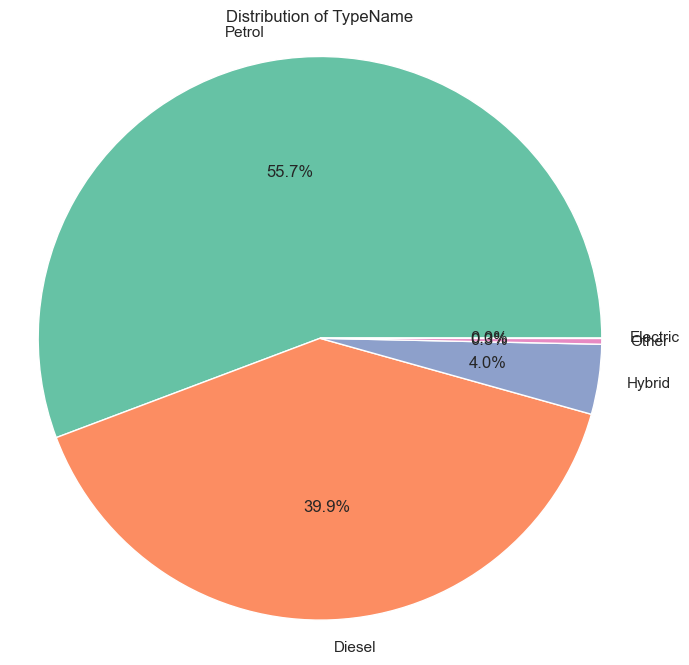

In [25]:
type_counts = df['fuelType'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of TypeName')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Optionally, add Seaborn styling
sns.set()
sns.set_palette("Set3")

plt.show()

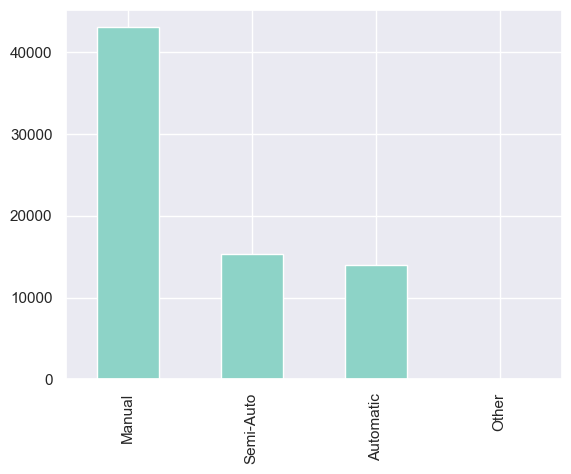

In [47]:
df['transmission'].value_counts().plot(kind='bar')
sns.set()
sns.set_palette("Set3")

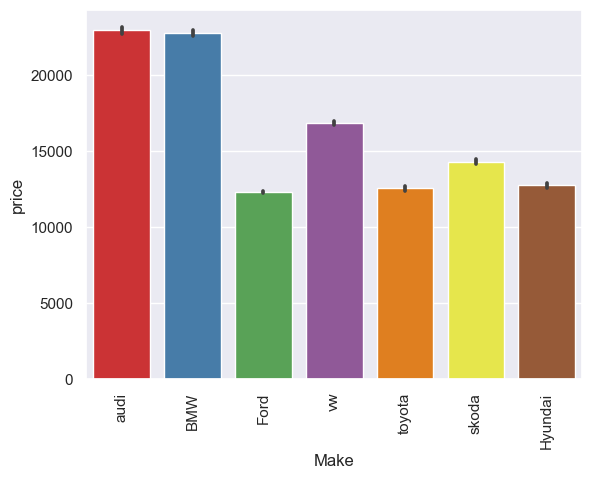

In [23]:
sns.barplot(x=df['Make'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\barath\AppData\Local\Temp\ipykernel_2592\2338093517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],color="orange")


<Axes: xlabel='price', ylabel='Density'>

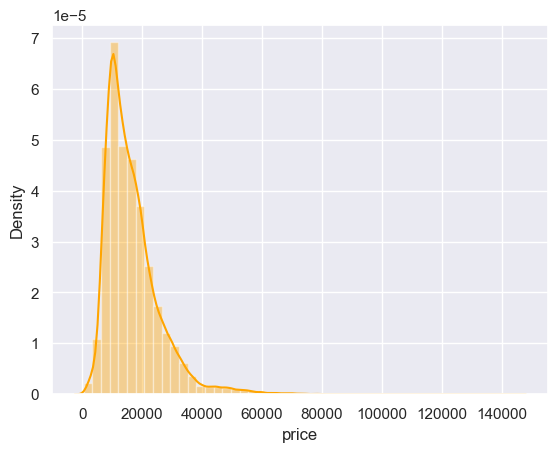

In [88]:
sns.distplot(df['price'],color="orange")

In [89]:
# Find IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

10186.0


In [90]:
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) |(df['price'] > (Q3 + 1.5 * IQR)))]
df.shape

(69735, 10)

C:\Users\barath\AppData\Local\Temp\ipykernel_2592\4101310310.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], color="blue")


<Axes: xlabel='price', ylabel='Density'>

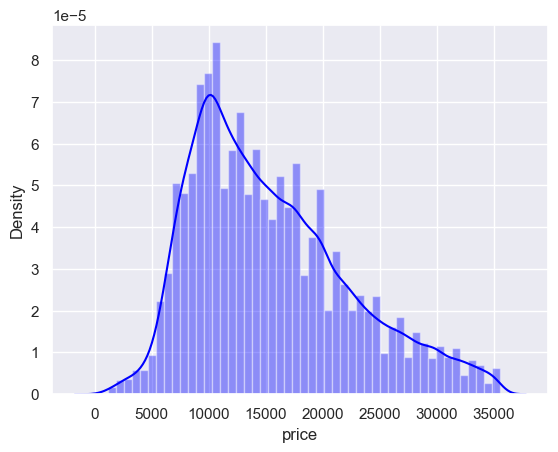

In [91]:
# Show the distribution of price: outliers removed
sns.distplot(df['price'], color="blue")

In [92]:
correlation=df.corr()

C:\Users\barath\AppData\Local\Temp\ipykernel_2592\1332955121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


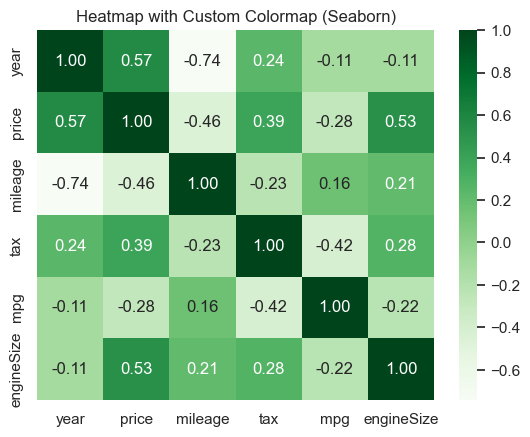

In [71]:
cmap = 'Greens'
sns.heatmap(correlation, cmap=cmap, annot=True, fmt=".2f")
plt.title("Heatmap with Custom Colormap (Seaborn)")
plt.show()

In [161]:
X=df.drop('price',axis=1)
y=df['price']

In [162]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)


In [163]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi


In [164]:
x = train_data[['transmission', 'fuelType', 'Make']]

# Use pd.get_dummies to one-hot encode the categorical columns
categorical_dummies = pd.get_dummies(x, prefix=['transmission', 'fuelType', 'Make'])

# Concatenate the one-hot encoded columns to the DataFrame
train_data = pd.concat([train_data, categorical_dummies], axis=1)

# Drop the original categorical columns (if needed)
train_data.drop(columns=['transmission', 'fuelType', 'Make'], inplace=True)


In [165]:
train_data

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,Make_BMW,Make_Ford,Make_Hyundai,Make_audi,Make_skoda,Make_toyota,Make_vw
45770,Passat,2018,13989,35063,145,70.6,1.6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
46774,Polo,2018,9998,15425,145,60.1,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
56466,Yaris,2017,13995,15472,0,86.0,1.5,1,0,0,...,1,0,0,0,0,0,0,0,1,0
61906,Octavia,2019,20298,10,145,54.3,2.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41087,Golf,2015,15500,33614,20,67.3,2.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,EcoSport,2019,14989,9171,145,53.3,1.0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
6265,A3,2019,32950,2308,145,34.5,2.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
54886,Corolla,2019,22990,7000,135,78.5,1.8,1,0,0,...,1,0,0,0,0,0,0,0,1,0
860,A1,2020,20990,556,145,47.9,1.0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [166]:
# Perform leave-one-out encoding for card_type, card_number, and tidv

from category_encoders import LeaveOneOutEncoder
looe_encoder = LeaveOneOutEncoder(cols=['model'])
train_data= looe_encoder.fit_transform(train_data, train_data['price'])

In [167]:
train_data

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,Make_BMW,Make_Ford,Make_Hyundai,Make_audi,Make_skoda,Make_toyota,Make_vw
45770,16681.898876,2018,13989,35063,145,70.6,1.6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
46774,11359.745083,2018,9998,15425,145,60.1,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
56466,10541.772861,2017,13995,15472,0,86.0,1.5,1,0,0,...,1,0,0,0,0,0,0,0,1,0
61906,13953.437391,2019,20298,10,145,54.3,2.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41087,16665.260478,2015,15500,33614,20,67.3,2.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,12512.529476,2019,14989,9171,145,53.3,1.0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
6265,17399.412411,2019,32950,2308,145,34.5,2.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
54886,20772.962085,2019,22990,7000,135,78.5,1.8,1,0,0,...,1,0,0,0,0,0,0,0,1,0
860,14305.022243,2020,20990,556,145,47.9,1.0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [168]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data)
train_data= pd.DataFrame(scaled_data, columns=train_data.columns)

In [169]:
train_data

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,Make_BMW,Make_Ford,Make_Hyundai,Make_audi,Make_skoda,Make_toyota,Make_vw
0,0.016603,0.442559,-0.277221,0.559085,0.438958,0.866383,-0.064119,2.038958,-1.211860,-0.008309,...,-0.205363,-0.056131,-1.121191,-0.418514,-0.572169,-0.269029,-0.416462,-0.306861,-0.321809,1.944731
1,-0.705097,0.442559,-0.707768,-0.365526,0.438958,0.248558,-1.135665,-0.490446,0.825178,-0.008309,...,-0.205363,-0.056131,0.891909,-0.418514,-0.572169,-0.269029,-0.416462,-0.306861,-0.321809,1.944731
2,-0.816016,-0.032321,-0.276574,-0.363313,-1.826357,1.772525,-0.242710,2.038958,-1.211860,-0.008309,...,4.869425,-0.056131,-1.121191,-0.418514,-0.572169,-0.269029,-0.416462,-0.306861,3.107430,-0.514210
3,-0.353385,0.917438,0.403392,-1.091307,0.438958,-0.092716,0.650245,-0.490446,-1.211860,-0.008309,...,-0.205363,-0.056131,-1.121191,-0.418514,-0.572169,-0.269029,-0.416462,3.258805,-0.321809,-0.514210
4,0.014346,-0.982080,-0.114215,0.490862,-1.513900,0.672209,0.650245,-0.490446,0.825178,-0.008309,...,-0.205363,-0.056131,-1.121191,-0.418514,-0.572169,-0.269029,-0.416462,-0.306861,-0.321809,1.944731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57943,-0.548776,0.917438,-0.169341,-0.659982,0.438958,-0.151556,-1.135665,-0.490446,0.825178,-0.008309,...,-0.205363,-0.056131,0.891909,-0.418514,1.747735,-0.269029,-0.416462,-0.306861,-0.321809,-0.514210
57944,0.113899,0.917438,1.768284,-0.983111,0.438958,-1.257756,0.650245,-0.490446,-1.211860,-0.008309,...,-0.205363,-0.056131,0.891909,-0.418514,-0.572169,-0.269029,2.401182,-0.306861,-0.321809,-0.514210
57945,0.571362,0.917438,0.693803,-0.762199,0.282730,1.331222,0.293063,2.038958,-1.211860,-0.008309,...,4.869425,-0.056131,-1.121191,-0.418514,-0.572169,-0.269029,-0.416462,-0.306861,3.107430,-0.514210
57946,-0.305709,1.392318,0.478044,-1.065600,0.438958,-0.469294,-1.135665,-0.490446,0.825178,-0.008309,...,-0.205363,-0.056131,0.891909,-0.418514,-0.572169,-0.269029,2.401182,-0.306861,-0.321809,-0.514210


In [170]:
z = test_data[['transmission', 'fuelType', 'Make']]

# Use pd.get_dummies to one-hot encode the categorical columns
categorical_dummies = pd.get_dummies(z, prefix=['transmission', 'fuelType', 'Make'])

# Concatenate the one-hot encoded columns to the DataFrame
test_data = pd.concat([test_data, categorical_dummies], axis=1)

# Drop the original categorical columns (if needed)
test_data.drop(columns=['transmission', 'fuelType', 'Make'], inplace=True)

In [171]:

from category_encoders import LeaveOneOutEncoder
looe_encoder = LeaveOneOutEncoder(cols=['model'])
test_data= looe_encoder.fit_transform(test_data, test_data['price'])

In [172]:
test_data.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,...,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,Make_BMW,Make_Ford,Make_Hyundai,Make_audi,Make_skoda,Make_toyota,Make_vw
59074,7939.357143,2017,8495,11879,145,67.0,1.0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9194,36759.608696,2019,39990,6392,145,50.4,3.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7979,21012.623574,2016,11990,70000,20,70.6,2.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
64571,14101.283077,2019,16450,3815,145,67.3,2.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3026,23090.221014,2017,19998,30194,145,55.4,2.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(test_data)
test_data= pd.DataFrame(scaled_data, columns=test_data.columns)

In [174]:
test_data.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,...,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,Make_BMW,Make_Ford,Make_Hyundai,Make_audi,Make_skoda,Make_toyota,Make_vw
0,-1.163489,-0.046134,-0.867855,-0.518511,0.433780,0.639299,-1.117607,-0.490555,-1.199537,1.904845,...,-0.200151,-0.06285,0.888483,-0.416775,-0.582691,-0.264762,-0.412087,-0.311317,3.184941,-0.515229
1,2.681460,0.914136,2.477321,-0.771414,0.433780,-0.304822,2.404423,2.038508,-1.199537,-0.524977,...,-0.200151,-0.06285,-1.125514,-0.416775,-0.582691,-0.264762,2.426671,-0.311317,-0.313978,-0.515229
2,0.580633,-0.526269,-0.496640,2.160358,-1.513568,0.844049,0.643408,-0.490555,0.833655,-0.524977,...,-0.200151,-0.06285,-1.125514,-0.416775,-0.582691,-0.264762,2.426671,-0.311317,-0.313978,-0.515229
3,-0.341418,0.914136,-0.022931,-0.890191,0.433780,0.656362,0.643408,-0.490555,-1.199537,1.904845,...,-0.200151,-0.06285,-1.125514,-0.416775,-0.582691,-0.264762,-0.412087,3.212160,-0.313978,-0.515229
4,0.857808,-0.046134,0.353913,0.325650,0.433780,-0.020448,0.643408,-0.490555,-1.199537,1.904845,...,-0.200151,-0.06285,-1.125514,-0.416775,-0.582691,-0.264762,2.426671,-0.311317,-0.313978,-0.515229


In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming you have already split your data into train_data and test_data
# Replace 'target_column' with the actual name of your target variable
target_column = 'price'

# Extract the target variable
y_train = train_data[target_column]
y_test = test_data[target_column]

# Align the columns of X_train and X_test to ensure they have the same features
X_train, X_test = train_data.align(test_data, join='inner', axis=1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)



Mean Squared Error: 0.0002680379887114062
Root Mean Squared Error (RMSE): 0.016371865767572314
R-squared: 0.9997319620112886


In [185]:
# Replace 'target_column' with the actual name of your target variable
from sklearn.tree import DecisionTreeRegressor
target_column = 'price'

# Extract the target variable
y_train = train_data[target_column]
y_test = test_data[target_column]

# Extract the features
X_train = train_data.drop(columns=[target_column])
X_test = test_data.drop(columns=[target_column])

# Align the columns of X_train and X_test to ensure they have the same features
X_train, X_test = train_data.align(test_data, join='inner', axis=1)


# Create a Decision Tree Regressor model
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)


Mean Squared Error: 6.489863791829299e-05
Root Mean Squared Error (RMSE): 0.008055969086229974
R-squared: 0.9999351013620817


In [186]:
pip install xgboost


In [190]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have already split your data into train_data and test_data
# Replace 'target_column' with the actual name of your target variable
target_column = 'price'

# Extract the target variable
y_train = train_data[target_column]
y_test = test_data[target_column]

# Extract the features
X_train = train_data.drop(columns=[target_column])
X_test = test_data.drop(columns=[target_column])

# Align the columns of X_train and X_test to ensure they have the same features
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

# Create an XGBoost Regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)


Mean Squared Error: 0.09962167062273085
Root Mean Squared Error (RMSE): 0.31562900789175075
R-squared: 0.9003783293772691
